'userID': unique user identifier
'age': age
'sessions': session identifier for each user
'time_spent': minutes spent browsing the website
'pages_visited': count of pages visited on the website
'cart_items': number of items in the user's cart
'cart_value': total $ value of the cart
'checkout_status': 1 or 0 indicating wether the user checked out or not (1=Yes, 0=No)
'device': the type of device the user is using (Desktop, Mobile or Tablet)
'location': the user's location

In [555]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [556]:
df = pd.read_csv('/Users/mikeredshaw/Downloads/midterm_data.csv')

In [557]:
df.head(10)

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4
5,6,57,9,36.061679,9,16,195.40,1,Desktop,Location 5
6,7,27,2,6.259057,1,14,116.28,0,Mobile,Location 2
7,8,37,8,28.509460,7,16,118.14,1,Desktop,Location 1
8,9,39,5,21.073814,7,25,175.00,0,Tablet,Location 1
9,10,54,5,28.689260,6,22,196.29,0,Desktop,Location 2


In [558]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           5000 non-null   int64  
 1   age              5000 non-null   int64  
 2   sessions         5000 non-null   int64  
 3   time_spent       5000 non-null   float64
 4   pages_visited    5000 non-null   int64  
 5   cart_items       5000 non-null   int64  
 6   cart_value       5000 non-null   float64
 7   checkout_status  5000 non-null   int64  
 8   device           4900 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 390.8+ KB


In [559]:
df.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4900,4970
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2538,1056
mean,2500.500000,41.538200,5.027200,25.158496,5.774400,14.966400,149.443146,0.272400,NaN,NaN
std,1443.520003,14.042734,2.594958,9.825536,2.570842,6.046336,68.711683,0.445239,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.750000,29.000000,3.000000,18.268862,4.000000,10.000000,92.482500,0.000000,NaN,NaN
50%,2500.500000,42.000000,5.000000,25.035361,6.000000,15.000000,143.440000,0.000000,NaN,NaN
75%,3750.250000,54.000000,7.000000,32.000361,8.000000,20.000000,198.380000,1.000000,NaN,NaN


So in terms of missing data, only device and location have missing data. I will first look to work with the location data.

In [560]:
df[df['location'].isnull()]

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
59,60,33,4,26.020972,6,17,121.32,1,Desktop,NaN
202,203,47,7,31.185720,6,21,203.65,0,Desktop,NaN
373,374,44,8,17.284851,3,6,45.42,0,Mobile,NaN
915,916,34,5,44.456958,12,10,114.31,0,Mobile,NaN
925,926,21,8,25.241298,5,13,154.60,1,Desktop,NaN
1024,1025,29,7,21.590777,5,17,111.98,0,Desktop,NaN
1146,1147,50,9,14.580795,3,18,195.44,0,Desktop,NaN
1459,1460,61,8,21.810562,5,20,213.12,0,Desktop,NaN
1585,1586,39,5,18.592650,4,16,169.93,0,Mobile,NaN
1595,1596,44,2,8.551168,2,18,190.21,0,Desktop,NaN


Because there is only 30 values out of 5000 missing, I will look at filling with mode. I will then check to see if the data is still okay.

In [561]:
df_test = df.copy()

In [562]:
df_test['location'] = df_test['location'].fillna(df_test['location'].mode()[0])

In [563]:
df_test.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4900,5000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2538,1086
mean,2500.500000,41.538200,5.027200,25.158496,5.774400,14.966400,149.443146,0.272400,NaN,NaN
std,1443.520003,14.042734,2.594958,9.825536,2.570842,6.046336,68.711683,0.445239,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.750000,29.000000,3.000000,18.268862,4.000000,10.000000,92.482500,0.000000,NaN,NaN
50%,2500.500000,42.000000,5.000000,25.035361,6.000000,15.000000,143.440000,0.000000,NaN,NaN
75%,3750.250000,54.000000,7.000000,32.000361,8.000000,20.000000,198.380000,1.000000,NaN,NaN


In [564]:
df.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4900,4970
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2538,1056
mean,2500.500000,41.538200,5.027200,25.158496,5.774400,14.966400,149.443146,0.272400,NaN,NaN
std,1443.520003,14.042734,2.594958,9.825536,2.570842,6.046336,68.711683,0.445239,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.750000,29.000000,3.000000,18.268862,4.000000,10.000000,92.482500,0.000000,NaN,NaN
50%,2500.500000,42.000000,5.000000,25.035361,6.000000,15.000000,143.440000,0.000000,NaN,NaN
75%,3750.250000,54.000000,7.000000,32.000361,8.000000,20.000000,198.380000,1.000000,NaN,NaN


In [565]:
df.groupby('location').describe(include='all')

userID                                                           
             count unique top freq         mean          std  min      25%   
location                                                                     
Location 1   979.0    NaN NaN  NaN  2428.888662  1460.439111  1.0  1115.00  \
Location 2   950.0    NaN NaN  NaN  2495.070526  1413.792983  4.0  1335.50   
Location 3  1014.0    NaN NaN  NaN  2477.388560  1437.144060  2.0  1248.25   
Location 4  1056.0    NaN NaN  NaN  2508.631629  1470.328379  3.0  1219.50   
Location 5   971.0    NaN NaN  NaN  2598.049434  1434.875326  6.0  1352.50   

                            ... device                                          
               50%     75%  ... unique      top freq mean  std  min  25%  50%   
location                    ...                                                 
Location 1  2431.0  3683.5  ...      3  Desktop  500  NaN  NaN  NaN  NaN  NaN  \
Location 2  2517.0  3674.0  ...      3  Desktop  463  NaN  NaN  NaN  NaN  NaN   
Location 3  2378.5  3712.5  ...      3  Desktop  537  NaN  NaN  NaN  NaN  NaN   
Location 4  2517.5  3796.0  ...      3  Desktop  527  NaN  NaN  NaN  NaN  NaN   
Location 5  2664.0  3849.0  ...      3  Desktop  495  NaN  NaN  NaN  NaN  NaN   

                      
            75%  max  
location              
Location 1  NaN  NaN  
Location 2  NaN  NaN  
Location 3  NaN  NaN  
Location 4  NaN  NaN  
Location 5  NaN  NaN  

[5 rows x 99 columns]

In [566]:
df_test.groupby('location').describe(include='all')

userID                                                           
             count unique top freq         mean          std  min      25%   
location                                                                     
Location 1   979.0    NaN NaN  NaN  2428.888662  1460.439111  1.0  1115.00  \
Location 2   950.0    NaN NaN  NaN  2495.070526  1413.792983  4.0  1335.50   
Location 3  1014.0    NaN NaN  NaN  2477.388560  1437.144060  2.0  1248.25   
Location 4  1086.0    NaN NaN  NaN  2504.164825  1465.315481  3.0  1221.25   
Location 5   971.0    NaN NaN  NaN  2598.049434  1434.875326  6.0  1352.50   

                            ... device                                          
               50%     75%  ... unique      top freq mean  std  min  25%  50%   
location                    ...                                                 
Location 1  2431.0  3683.5  ...      3  Desktop  500  NaN  NaN  NaN  NaN  NaN  \
Location 2  2517.0  3674.0  ...      3  Desktop  463  NaN  NaN  NaN  NaN  NaN   
Location 3  2378.5  3712.5  ...      3  Desktop  537  NaN  NaN  NaN  NaN  NaN   
Location 4  2512.5  3781.5  ...      3  Desktop  543  NaN  NaN  NaN  NaN  NaN   
Location 5  2664.0  3849.0  ...      3  Desktop  495  NaN  NaN  NaN  NaN  NaN   

                      
            75%  max  
location              
Location 1  NaN  NaN  
Location 2  NaN  NaN  
Location 3  NaN  NaN  
Location 4  NaN  NaN  
Location 5  NaN  NaN  

[5 rows x 99 columns]

Because there was very minimal changes in the data of the two data sets, I feel confident that filling missing location data with the mode is appropriate and I will add that to the main Dataframe.

In [567]:
df['location'] = df['location'].fillna(df['location'].mode()[0])

In [568]:
df.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4900,5000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2538,1086
mean,2500.500000,41.538200,5.027200,25.158496,5.774400,14.966400,149.443146,0.272400,NaN,NaN
std,1443.520003,14.042734,2.594958,9.825536,2.570842,6.046336,68.711683,0.445239,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.750000,29.000000,3.000000,18.268862,4.000000,10.000000,92.482500,0.000000,NaN,NaN
50%,2500.500000,42.000000,5.000000,25.035361,6.000000,15.000000,143.440000,0.000000,NaN,NaN
75%,3750.250000,54.000000,7.000000,32.000361,8.000000,20.000000,198.380000,1.000000,NaN,NaN


I will now look to see how I can fill the missing device info. Because this data is only 2% of total device data, this should not cause too much bias in the final data, so I will look to fill with mode again.

In [569]:
df.groupby('device').describe()

userID                                                            
          count         mean          std  min      25%     50%      75%   
device                                                                     
Desktop  2538.0  2481.464933  1435.264432  1.0  1260.25  2497.5  3733.75  \
Mobile   1428.0  2518.448880  1457.420581  7.0  1236.75  2512.5  3807.75   
Tablet    934.0  2534.595289  1452.234322  5.0  1271.25  2513.0  3753.25   

                    age             ... cart_value         checkout_status   
            max   count       mean  ...        75%     max           count   
device                              ...                                      
Desktop  4999.0  2538.0  41.338849  ...   197.2450  427.40          2538.0  \
Mobile   4991.0  1428.0  41.724790  ...   201.6100  387.98          1428.0   
Tablet   5000.0   934.0  41.844754  ...   197.7025  377.98           934.0   

                                                      
             mean       std  min  25%  50%  75%  max  
device                                                
Desktop  0.285264  0.451629  0.0  0.0  0.0  1.0  1.0  
Mobile   0.264706  0.441331  0.0  0.0  0.0  1.0  1.0  
Tablet   0.254818  0.435992  0.0  0.0  0.0  1.0  1.0  

[3 rows x 64 columns]

In [570]:
df_test2 = df.copy()

In [571]:
df_test2['device'] = df_test2['device'].fillna(df_test2['device'].mode()[0])


In [572]:
df_test2.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000,5000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2638,1086
mean,2500.500000,41.538200,5.027200,25.158496,5.774400,14.966400,149.443146,0.272400,NaN,NaN
std,1443.520003,14.042734,2.594958,9.825536,2.570842,6.046336,68.711683,0.445239,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.750000,29.000000,3.000000,18.268862,4.000000,10.000000,92.482500,0.000000,NaN,NaN
50%,2500.500000,42.000000,5.000000,25.035361,6.000000,15.000000,143.440000,0.000000,NaN,NaN
75%,3750.250000,54.000000,7.000000,32.000361,8.000000,20.000000,198.380000,1.000000,NaN,NaN


Its successfully filled. Now lets check to make sure the data wasn't changed too much

In [573]:
df.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4900,5000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2538,1086
mean,2500.500000,41.538200,5.027200,25.158496,5.774400,14.966400,149.443146,0.272400,NaN,NaN
std,1443.520003,14.042734,2.594958,9.825536,2.570842,6.046336,68.711683,0.445239,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.750000,29.000000,3.000000,18.268862,4.000000,10.000000,92.482500,0.000000,NaN,NaN
50%,2500.500000,42.000000,5.000000,25.035361,6.000000,15.000000,143.440000,0.000000,NaN,NaN
75%,3750.250000,54.000000,7.000000,32.000361,8.000000,20.000000,198.380000,1.000000,NaN,NaN


In [574]:
df.groupby('device').describe(include='all')

userID                                                           
          count unique top freq         mean          std  min      25%   
device                                                                    
Desktop  2538.0    NaN NaN  NaN  2481.464933  1435.264432  1.0  1260.25  \
Mobile   1428.0    NaN NaN  NaN  2518.448880  1457.420581  7.0  1236.75   
Tablet    934.0    NaN NaN  NaN  2534.595289  1452.234322  5.0  1271.25   

                          ... location                                        
            50%      75%  ...   unique         top freq mean  std  min  25%   
device                    ...                                                 
Desktop  2497.5  3733.75  ...        5  Location 4  543  NaN  NaN  NaN  NaN  \
Mobile   2512.5  3807.75  ...        5  Location 4  312  NaN  NaN  NaN  NaN   
Tablet   2513.0  3753.25  ...        5  Location 4  202  NaN  NaN  NaN  NaN   

                        
         50%  75%  max  
device                  
Desktop  NaN  NaN  NaN  
Mobile   NaN  NaN  NaN  
Tablet   NaN  NaN  NaN  

[3 rows x 99 columns]

In [575]:
df_test2.groupby('device').describe(include='all')

userID                                                           
          count unique top freq         mean          std  min      25%   
device                                                                    
Desktop  2638.0    NaN NaN  NaN  2478.712282  1433.010644  1.0  1259.25  \
Mobile   1428.0    NaN NaN  NaN  2518.448880  1457.420581  7.0  1236.75   
Tablet    934.0    NaN NaN  NaN  2534.595289  1452.234322  5.0  1271.25   

                          ... location                                        
            50%      75%  ...   unique         top freq mean  std  min  25%   
device                    ...                                                 
Desktop  2494.5  3720.50  ...        5  Location 4  572  NaN  NaN  NaN  NaN  \
Mobile   2512.5  3807.75  ...        5  Location 4  312  NaN  NaN  NaN  NaN   
Tablet   2513.0  3753.25  ...        5  Location 4  202  NaN  NaN  NaN  NaN   

                        
         50%  75%  max  
device                  
Desktop  NaN  NaN  NaN  
Mobile   NaN  NaN  NaN  
Tablet   NaN  NaN  NaN  

[3 rows x 99 columns]

Again, the data seems to change very little when filling with mode, with only minimal changes in the desktop values. I feel confident that mode is a good way to fill these missing values and I'll apply this fill method to the original dataframe

In [576]:
df['device'] = df['device'].fillna(df['device'].mode()[0])

In [577]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           5000 non-null   int64  
 1   age              5000 non-null   int64  
 2   sessions         5000 non-null   int64  
 3   time_spent       5000 non-null   float64
 4   pages_visited    5000 non-null   int64  
 5   cart_items       5000 non-null   int64  
 6   cart_value       5000 non-null   float64
 7   checkout_status  5000 non-null   int64  
 8   device           5000 non-null   object 
 9   location         5000 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 390.8+ KB


All values are filled. Now i'll check to make sure data hasn't changed much from before.

In [578]:
df.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000,5000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2638,1086
mean,2500.500000,41.538200,5.027200,25.158496,5.774400,14.966400,149.443146,0.272400,NaN,NaN
std,1443.520003,14.042734,2.594958,9.825536,2.570842,6.046336,68.711683,0.445239,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.750000,29.000000,3.000000,18.268862,4.000000,10.000000,92.482500,0.000000,NaN,NaN
50%,2500.500000,42.000000,5.000000,25.035361,6.000000,15.000000,143.440000,0.000000,NaN,NaN
75%,3750.250000,54.000000,7.000000,32.000361,8.000000,20.000000,198.380000,1.000000,NaN,NaN


In [579]:
df.dtypes

userID               int64
age                  int64
sessions             int64
time_spent         float64
pages_visited        int64
cart_items           int64
cart_value         float64
checkout_status      int64
device              object
location            object
dtype: object

All datatypes seem to all make sense and be correct. I will now look to see if there are any outliers in the data.

<Axes: >

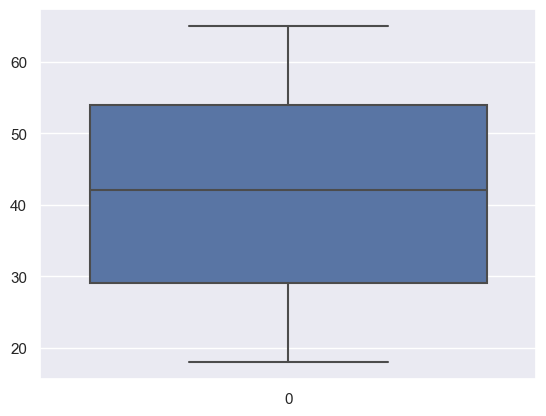

In [580]:
sns.boxplot(data=df['age'])

<Axes: >

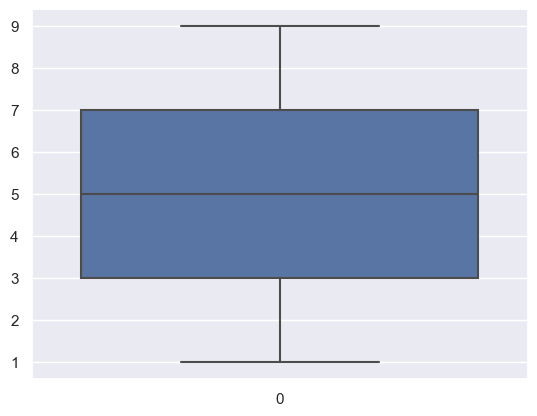

In [581]:
sns.boxplot(data=df['sessions'])

<Axes: >

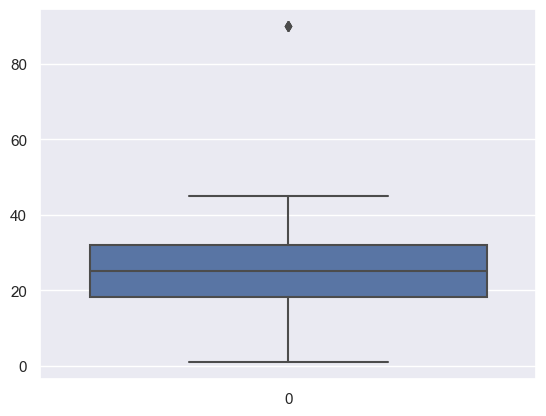

In [582]:
sns.boxplot(data=df['time_spent'])

There is an outlier in time spent. I will look at this data point to see what to do about it.

In [583]:
df[df['time_spent']>50]

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
284,285,47,5,90.0,12,14,148.45,0,Desktop,Location 4
2494,2495,28,2,90.0,12,18,151.35,0,Desktop,Location 1
2833,2834,30,8,90.0,12,7,88.32,0,Desktop,Location 1
3957,3958,19,1,90.0,12,20,228.70,0,Desktop,Location 4


There are only 4 values which have a time spent over 50 minutes, and these are all at 90 minute. This could mean that the user left the computer and the session timed out.  However, I don't feel as though this data is insignificant and may still be usefull - so I won't remove them for now.

<Axes: >

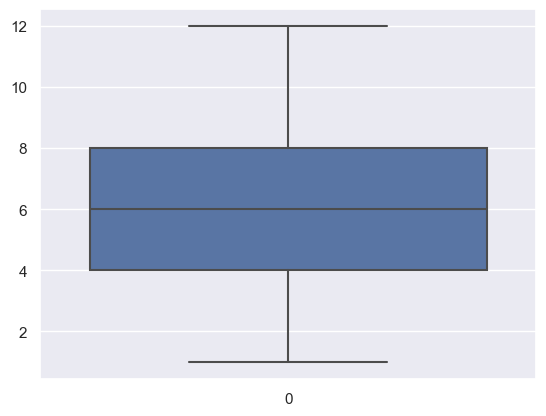

In [584]:
sns.boxplot(data=df['pages_visited'])

<Axes: >

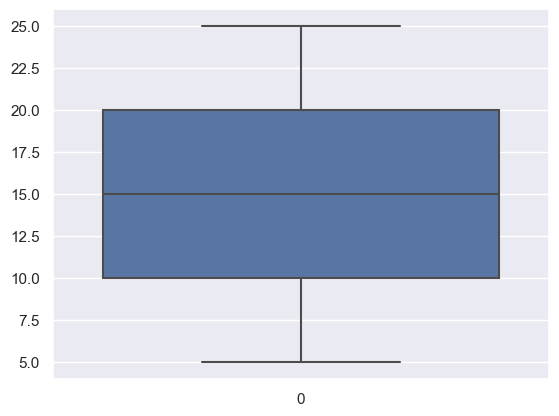

In [585]:
sns.boxplot(data=df['cart_items'])

<Axes: >

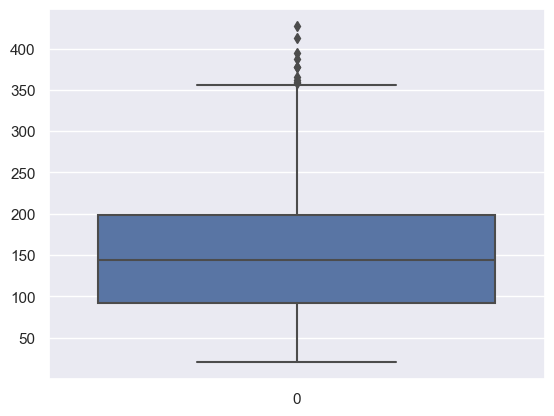

In [586]:
sns.boxplot(data=df['cart_value'])

Some outliers in cart value. Lets check them out.

In [587]:
df[df['cart_value']>370]

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
263,264,51,2,27.829392,6,25,377.54,0,Desktop,Location 3
445,446,54,6,28.570670,8,25,387.98,0,Mobile,Location 3
1268,1269,29,4,11.128085,4,25,377.98,0,Tablet,Location 1
2664,2665,26,5,30.800618,7,24,394.77,0,Desktop,Location 1
2769,2770,51,3,33.897577,7,25,413.11,0,Desktop,Location 3
3200,3201,24,4,27.136662,6,24,427.40,0,Desktop,Location 3


Although they are out of the normal range of the data, they aren't significant enough to consider accidental outliers and are still useful information. I will keep them for now.

Check to make sure all checkout status is properly unique to the binary 0 & 1.

In [588]:
df['checkout_status'].unique()

array([0, 1])

<Axes: xlabel='device', ylabel='Count'>

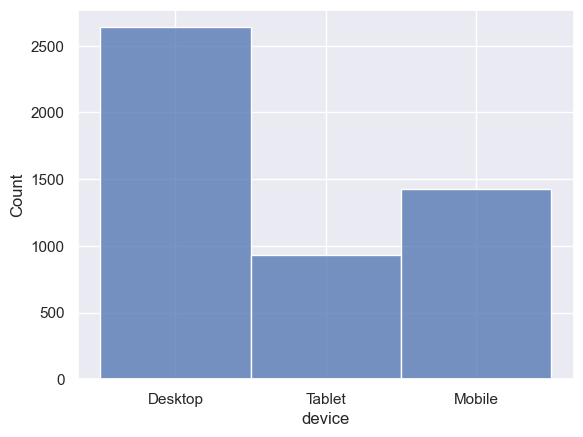

In [589]:
sns.histplot(data=df, x='device')

We can see the frequency of people putting items in their cart is much higher on the desktop than the tablet or mobile.

<Axes: xlabel='location', ylabel='Count'>

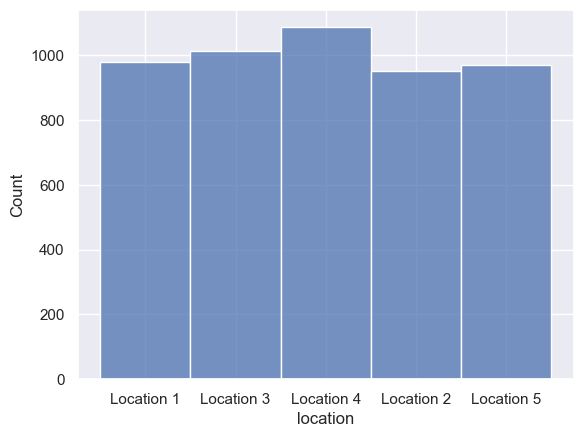

In [590]:
sns.histplot(data=df, x='location')

Location data is relatively even in terms of products in cart count for users.

In [591]:
df.head(5)

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4


Lets check the distribution of the cart_value to see if it's evenly distributes

<Axes: xlabel='cart_value', ylabel='Count'>

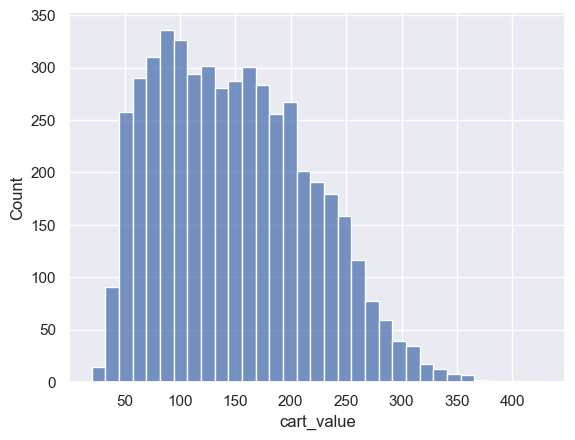

In [592]:
sns.histplot(data=df, x='cart_value')

Cart value has a slight right skew, but it is not overly intense. Let's check the mean and the median to check this out.

In [593]:
from scipy import stats
print(stats.skew(df['cart_value']))

0.44258515919186503


This represents a soft right skew and shouldn't cause problems.

<Axes: xlabel='time_spent', ylabel='Count'>

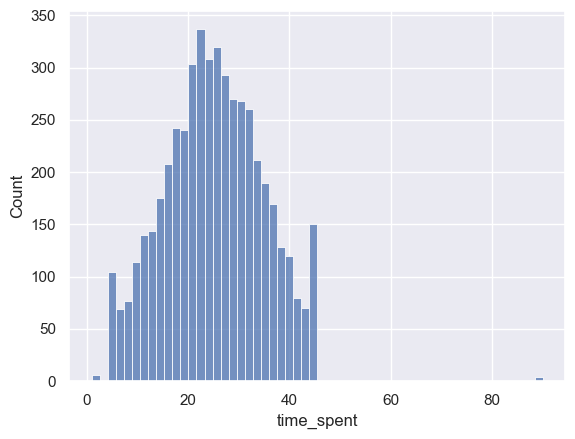

In [594]:
sns.histplot(data=df, x='time_spent')

Okay based on this graph, the few 90 minute time spent values are causing issues. We wan't the values to be evenly distributed if possible to ensure proper calculations can be done. I'll drop them.

In [595]:
df_test3 = df.copy()

In [596]:
drop_price_outliers = df_test3[df_test3['time_spent']>80].index
df_test3.drop(drop_price_outliers, inplace=True)

In [597]:
df_test3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4996 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4996 non-null   int64  
 1   age              4996 non-null   int64  
 2   sessions         4996 non-null   int64  
 3   time_spent       4996 non-null   float64
 4   pages_visited    4996 non-null   int64  
 5   cart_items       4996 non-null   int64  
 6   cart_value       4996 non-null   float64
 7   checkout_status  4996 non-null   int64  
 8   device           4996 non-null   object 
 9   location         4996 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 429.3+ KB


The four outliers have been dropped. Let's check the overall data now to make sure it didn't mess anything up too much.

In [598]:
df_test3.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996,4996
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2634,1084
mean,2500.586069,41.546637,5.028022,25.106582,5.769416,14.966573,149.439333,0.272618,NaN,NaN
std,1443.602588,14.042265,2.594677,9.656546,2.565825,6.047119,68.724594,0.445351,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.750000,29.000000,3.000000,18.263008,4.000000,10.000000,92.482500,0.000000,NaN,NaN
50%,2500.500000,42.000000,5.000000,25.026358,6.000000,15.000000,143.290000,0.000000,NaN,NaN
75%,3750.250000,54.000000,7.000000,31.981057,8.000000,20.000000,198.380000,1.000000,NaN,NaN


In [599]:
df.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000,5000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2638,1086
mean,2500.500000,41.538200,5.027200,25.158496,5.774400,14.966400,149.443146,0.272400,NaN,NaN
std,1443.520003,14.042734,2.594958,9.825536,2.570842,6.046336,68.711683,0.445239,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.750000,29.000000,3.000000,18.268862,4.000000,10.000000,92.482500,0.000000,NaN,NaN
50%,2500.500000,42.000000,5.000000,25.035361,6.000000,15.000000,143.440000,0.000000,NaN,NaN
75%,3750.250000,54.000000,7.000000,32.000361,8.000000,20.000000,198.380000,1.000000,NaN,NaN


Nothing changed too much so I feel confident in applying this to the main df.

In [600]:
drop_price_outliers = df[df['time_spent']>80].index
df.drop(drop_price_outliers, inplace=True)

In [601]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4996 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4996 non-null   int64  
 1   age              4996 non-null   int64  
 2   sessions         4996 non-null   int64  
 3   time_spent       4996 non-null   float64
 4   pages_visited    4996 non-null   int64  
 5   cart_items       4996 non-null   int64  
 6   cart_value       4996 non-null   float64
 7   checkout_status  4996 non-null   int64  
 8   device           4996 non-null   object 
 9   location         4996 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 429.3+ KB


In [602]:
df.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996,4996
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2634,1084
mean,2500.586069,41.546637,5.028022,25.106582,5.769416,14.966573,149.439333,0.272618,NaN,NaN
std,1443.602588,14.042265,2.594677,9.656546,2.565825,6.047119,68.724594,0.445351,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.750000,29.000000,3.000000,18.263008,4.000000,10.000000,92.482500,0.000000,NaN,NaN
50%,2500.500000,42.000000,5.000000,25.026358,6.000000,15.000000,143.290000,0.000000,NaN,NaN
75%,3750.250000,54.000000,7.000000,31.981057,8.000000,20.000000,198.380000,1.000000,NaN,NaN


Drop any duplicates if the dataset has them, as these would likely be incorrect data entry mistakes.

In [603]:
df.drop_duplicates()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4
...,...,...,...,...,...,...,...,...,...,...
4995,4996,48,8,45.000000,11,25,278.92,0,Tablet,Location 5
4996,4997,31,4,44.700747,9,12,78.97,0,Tablet,Location 2
4997,4998,34,5,27.146624,7,19,139.42,1,Desktop,Location 4
4998,4999,58,1,45.000000,11,24,203.42,0,Desktop,Location 5


In [604]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4996 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4996 non-null   int64  
 1   age              4996 non-null   int64  
 2   sessions         4996 non-null   int64  
 3   time_spent       4996 non-null   float64
 4   pages_visited    4996 non-null   int64  
 5   cart_items       4996 non-null   int64  
 6   cart_value       4996 non-null   float64
 7   checkout_status  4996 non-null   int64  
 8   device           4996 non-null   object 
 9   location         4996 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 429.3+ KB


No duplicates in the dataset. We can continue.

In [605]:
df.head()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4


<Axes: xlabel='cart_items', ylabel='Count'>

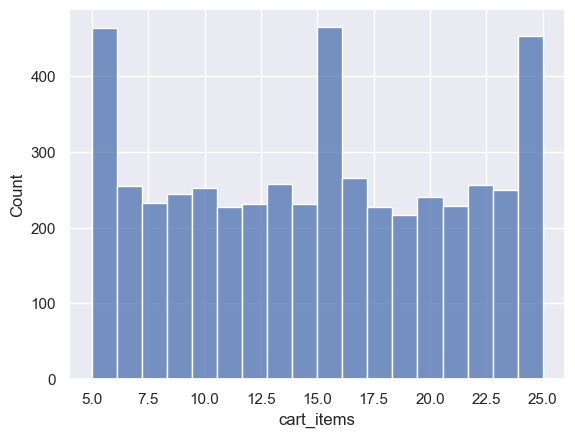

In [606]:
sns.histplot(data=df, x='cart_items')

Now lets start comparing some variables to see if there's any correlations

In [607]:
df_time_spent = df.groupby('checkout_status')['time_spent'].mean()
print(df_time_spent)

checkout_status
0    22.778612
1    31.317918
Name: time_spent, dtype: float64


We can see that on average, the more time spent on the site, the more people end up purchasing.

In [608]:
df_cart_value = df.groupby('checkout_status')['cart_value'].mean()
print(df_cart_value)

checkout_status
0    152.668225
1    140.824214
Name: cart_value, dtype: float64


On average, the higher the cart value, the less likely it is they end up purchasing.

In [609]:
df.head()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4


In [610]:
df_age_checkout = df.groupby('age')['checkout_status'].count()
print(df_age_checkout)

age
18    115
19    105
20     87
21    129
22    106
23    115
24    109
25    121
26     91
27    100
28     98
29    114
30     94
31     99
32     88
33     91
34    118
35    109
36     94
37     98
38    100
39    101
40     93
41     96
42    111
43    106
44     94
45    117
46    100
47    112
48    108
49     80
50     90
51     97
52    104
53     97
54    113
55    122
56    114
57    107
58    110
59    100
60    106
61    108
62    102
63    102
64    104
65    121
Name: checkout_status, dtype: int64


<Axes: xlabel='age', ylabel='checkout_status'>

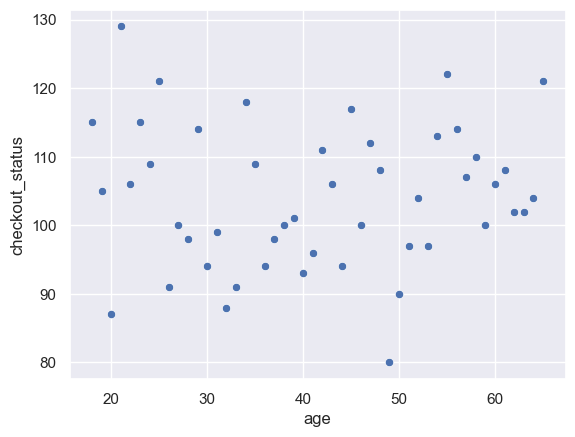

In [611]:
sns.scatterplot(data= df_age_checkout)

In [612]:
df_age_time = df.groupby('age')['time_spent'].mean()

In [613]:
print(df_age_time)

age
18    25.336409
19    23.567608
20    26.668182
21    25.276132
22    25.743944
23    25.105797
24    24.970018
25    26.055695
26    26.440349
27    25.174925
28    26.008989
29    24.810486
30    24.987669
31    24.638466
32    24.401252
33    25.957625
34    25.143643
35    25.137609
36    25.688941
37    24.178079
38    25.499591
39    25.039923
40    27.243938
41    24.899159
42    24.662235
43    24.384477
44    23.601244
45    27.049123
46    23.731455
47    25.846433
48    24.293325
49    24.795926
50    24.181201
51    24.156973
52    25.094616
53    24.325561
54    25.238028
55    24.541738
56    25.935034
57    23.696392
58    24.999370
59    24.785343
60    26.303703
61    25.216549
62    26.666335
63    24.352087
64    25.548732
65    23.732034
Name: time_spent, dtype: float64


Text(0, 0.5, 'Value')

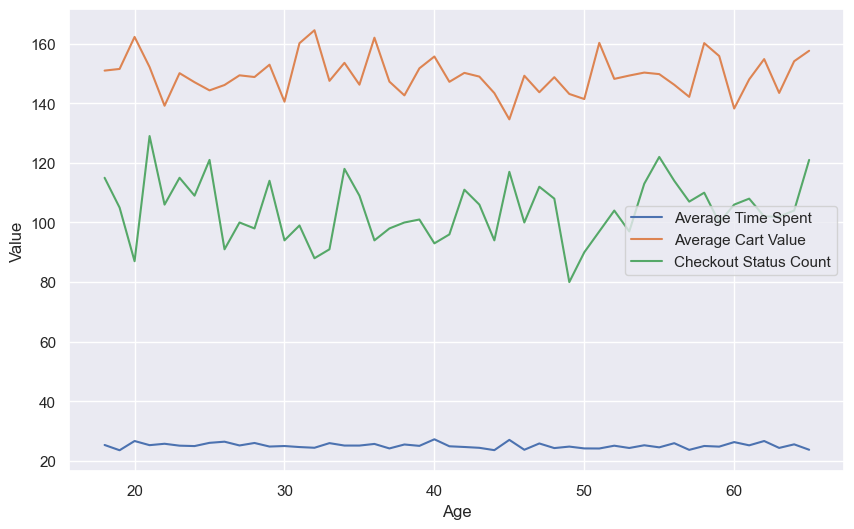

In [614]:

df_age_stats = df.groupby('age').agg({'time_spent': 'mean', 'cart_value': 'mean', 'checkout_status': 'count'}).reset_index()


fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(data=df_age_stats, x='age', y='time_spent', ax=ax, label='Average Time Spent')
sns.lineplot(data=df_age_stats, x='age', y='cart_value', ax=ax, label='Average Cart Value')
sns.lineplot(data=df_age_stats, x='age', y='checkout_status', ax=ax, label='Checkout Status Count')

ax.set_xlabel('Age')
ax.set_ylabel('Value')




Based on this it doesnt seem like age has too much to do with any of the major metrics. Let's check devices.

<Axes: xlabel='device', ylabel='checkout_status'>

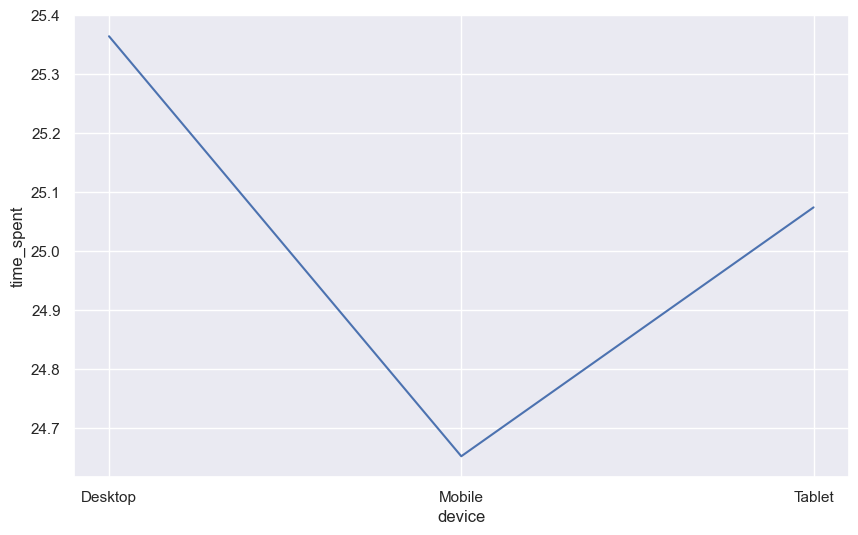

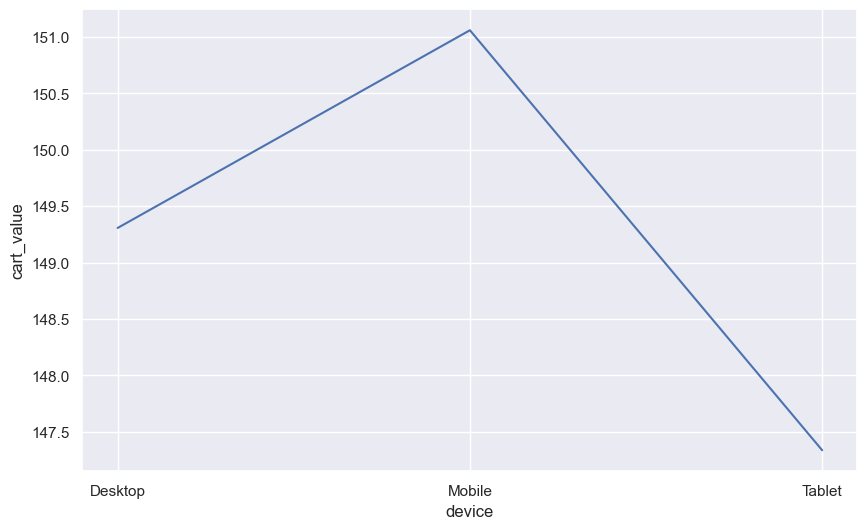

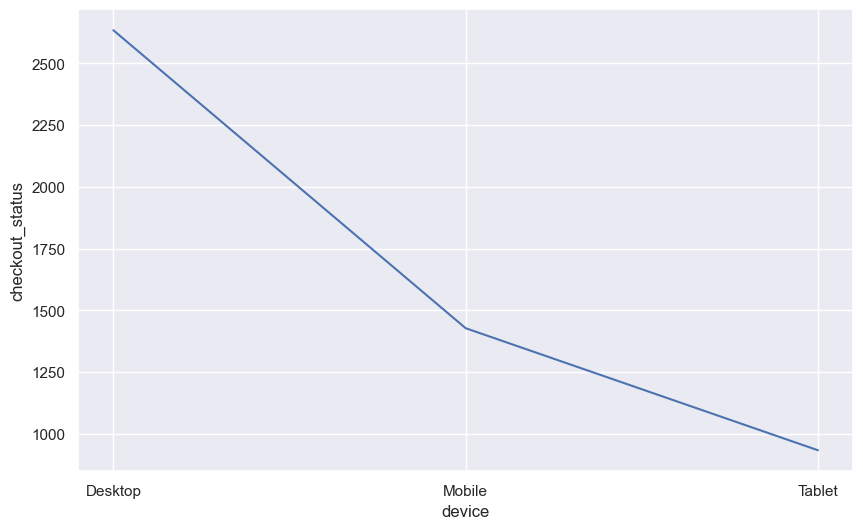

In [615]:

df_device_stats = df.groupby('device').agg({'time_spent': 'mean', 'cart_value': 'mean', 'checkout_status': 'count'}).reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df_device_stats, x='device', y='time_spent', ax=ax1)

fig, ax2 = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df_device_stats, x='device', y='cart_value', ax=ax2)

fig, ax3 = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df_device_stats, x='device', y='checkout_status', ax=ax3)



It seems like4 device has a significant effect on completed checkout numbers, however the amount of people shopping on desktop is much higher. Lets see the complete checkout percentage instead.

In [616]:
df_device_checkout = df.groupby('device')['checkout_status'].value_counts().unstack().reset_index()
df_device_checkout['checkout_percentage'] = df_device_checkout[1] / (df_device_checkout[0] + df_device_checkout[1]) * 100
print(df_device_checkout)

checkout_status   device     0    1  checkout_percentage
0                Desktop  1888  746            28.321944
1                 Mobile  1050  378            26.470588
2                 Tablet   696  238            25.481799


Theres a lift in overall positive checkouts when it comes to device, with the desktop being the best. Let's check if it's significant.

<Axes: xlabel='device', ylabel='checkout_percentage'>

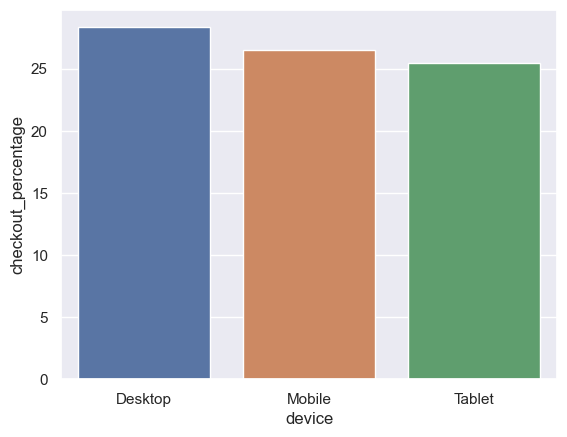

In [617]:


df_device_checkout = df.groupby('device')['checkout_status'].value_counts().unstack().reset_index()
df_device_checkout['checkout_percentage'] = df_device_checkout[1] / (df_device_checkout[0] + df_device_checkout[1]) * 100

sns.barplot(data=df_device_checkout, x='device', y='checkout_percentage')



I'm going to add a column called unit price into the dataframe to check if the average price has any impact.

In [618]:
df.head()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4


In [619]:
df.insert(df.columns.get_loc('cart_value'), 'unit_price', df['cart_value'] / df['cart_items'])

In [620]:
df.head()

,userID,age,sessions,time_spent,pages_visited,cart_items,unit_price,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,9.960500,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,14.039048,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,10.472609,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,11.486250,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,5.951000,59.51,1,Tablet,Location 4


In [621]:
df.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,unit_price,cart_value,checkout_status,device,location
count,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996,4996
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2634,1084
mean,2500.586069,41.546637,5.028022,25.106582,5.769416,14.966573,9.986720,149.439333,0.272618,NaN,NaN
std,1443.602588,14.042265,2.594677,9.656546,2.565825,6.047119,2.029275,68.724594,0.445351,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,3.890909,20.410000,0.000000,NaN,NaN
25%,1250.750000,29.000000,3.000000,18.263008,4.000000,10.000000,8.610881,92.482500,0.000000,NaN,NaN
50%,2500.500000,42.000000,5.000000,25.026358,6.000000,15.000000,9.971800,143.290000,0.000000,NaN,NaN
75%,3750.250000,54.000000,7.000000,31.981057,8.000000,20.000000,11.319391,198.380000,1.000000,NaN,NaN


<Axes: xlabel='unit_price_range', ylabel='checkout_status'>

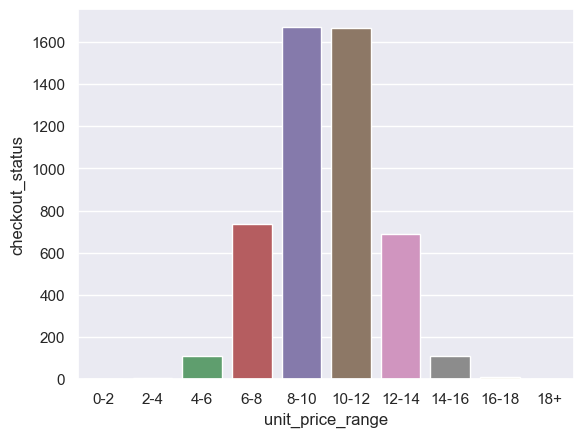

In [622]:


bins = [0 ,2, 4, 6, 8, 10, 12, 14, 16, 18, float('inf')]
labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '10-12','12-14', '14-16', '16-18', '18+']
df['unit_price_range'] = pd.cut(df['unit_price'], bins=bins, labels=labels)

df_bucket_checkout = df.groupby('unit_price_range')['checkout_status'].count().reset_index()


sns.barplot(data=df_bucket_checkout, x='unit_price_range', y='checkout_status')



<Axes: xlabel='unit_price_range', ylabel='checkout_percentage'>

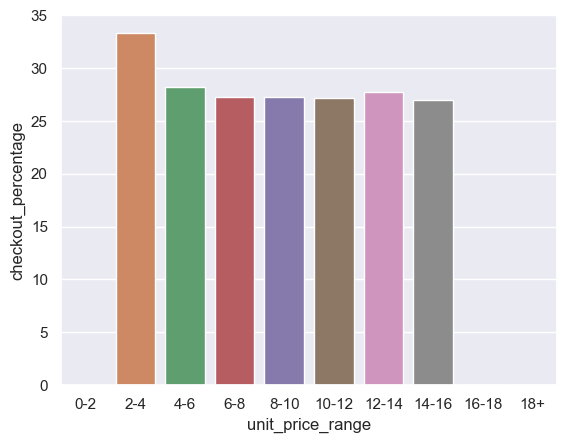

In [623]:
df_price_range_checkout = df.groupby('unit_price_range')['checkout_status'].value_counts().unstack().reset_index()
df_price_range_checkout['checkout_percentage'] = df_price_range_checkout[1] / (df_price_range_checkout[0] + df_price_range_checkout[1]) * 100

sns.barplot(data=df_price_range_checkout, x='unit_price_range', y='checkout_percentage')

In [624]:
print(df_price_range_checkout)

checkout_status unit_price_range     0    1  checkout_percentage
0                            0-2     0    0                  NaN
1                            2-4     2    1            33.333333
2                            4-6    79   31            28.181818
3                            6-8   537  201            27.235772
4                           8-10  1216  456            27.272727
5                          10-12  1214  452            27.130852
6                          12-14   497  191            27.761628
7                          14-16    81   30            27.027027
8                          16-18     7    0             0.000000
9                            18+     1    0             0.000000


According to this, the lower the average price of a product in someones cart, the higher chance they purchase. However the sample size. in this is low which might explain why

In [625]:
df.head()

,userID,age,sessions,time_spent,pages_visited,cart_items,unit_price,cart_value,checkout_status,device,location,unit_price_range
0,1,62,3,13.295129,2,20,9.960500,199.21,0,Desktop,Location 1,8-10
1,2,65,2,21.686405,3,21,14.039048,294.82,0,Desktop,Location 3,14-16
2,3,18,7,17.135220,4,23,10.472609,240.87,0,Desktop,Location 4,10-12
3,4,21,9,29.589311,8,16,11.486250,183.78,1,Desktop,Location 2,10-12
4,5,21,3,25.948584,4,10,5.951000,59.51,1,Tablet,Location 4,4-6


In [626]:
df.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,unit_price,cart_value,checkout_status,device,location,unit_price_range
count,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996,4996,4996
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5,9
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4,8-10
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2634,1084,1672
mean,2500.586069,41.546637,5.028022,25.106582,5.769416,14.966573,9.986720,149.439333,0.272618,NaN,NaN,NaN
std,1443.602588,14.042265,2.594677,9.656546,2.565825,6.047119,2.029275,68.724594,0.445351,NaN,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,3.890909,20.410000,0.000000,NaN,NaN,NaN
25%,1250.750000,29.000000,3.000000,18.263008,4.000000,10.000000,8.610881,92.482500,0.000000,NaN,NaN,NaN
50%,2500.500000,42.000000,5.000000,25.026358,6.000000,15.000000,9.971800,143.290000,0.000000,NaN,NaN,NaN
75%,3750.250000,54.000000,7.000000,31.981057,8.000000,20.000000,11.319391,198.380000,1.000000,NaN,NaN,NaN


I want to place the ages in buckets to help analyze that data

In [627]:

bins = [0, 18, 25, 35, 45, 55, float('inf')]
labels = ['0-18', '18-25', '25-35', '35-45', '45-55', '55+']

df['age_range'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

print(df)


      userID  age  sessions  time_spent  pages_visited  cart_items   
0          1   62         3   13.295129              2          20  \
1          2   65         2   21.686405              3          21   
2          3   18         7   17.135220              4          23   
3          4   21         9   29.589311              8          16   
4          5   21         3   25.948584              4          10   
...      ...  ...       ...         ...            ...         ...   
4995    4996   48         8   45.000000             11          25   
4996    4997   31         4   44.700747              9          12   
4997    4998   34         5   27.146624              7          19   
4998    4999   58         1   45.000000             11          24   
4999    5000   63         2   28.484907              7          10   

      unit_price  cart_value  checkout_status   device    location   
0       9.960500      199.21                0  Desktop  Location 1  \
1      14.039048   

<Axes: xlabel='age_range', ylabel='checkout_status'>

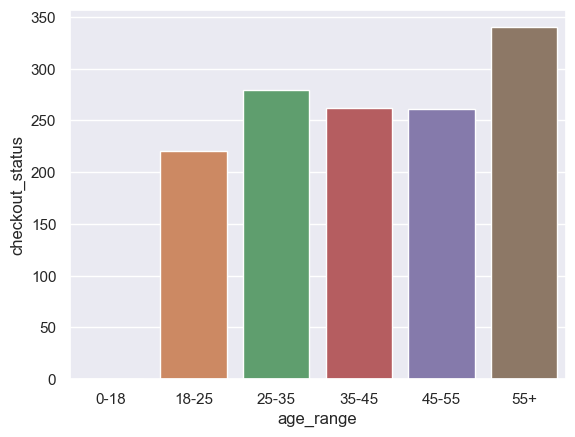

In [628]:

df_age_checkout = df[df['checkout_status'] == 1].groupby('age_range')['checkout_status'].count().reset_index()

sns.barplot(data=df_age_checkout, x='age_range', y='checkout_status')



In [629]:
df_age_device = df.groupby(['age_range', 'device'])['device'].count().unstack().reset_index()

print(df_age_device)


device age_range  Desktop  Mobile  Tablet
0           0-18        0       0       0
1          18-25      423     202     141
2          25-35      534     285     195
3          35-45      538     304     160
4          45-55      516     293     209
5            55+      623     344     229


<Axes: xlabel='age_range'>

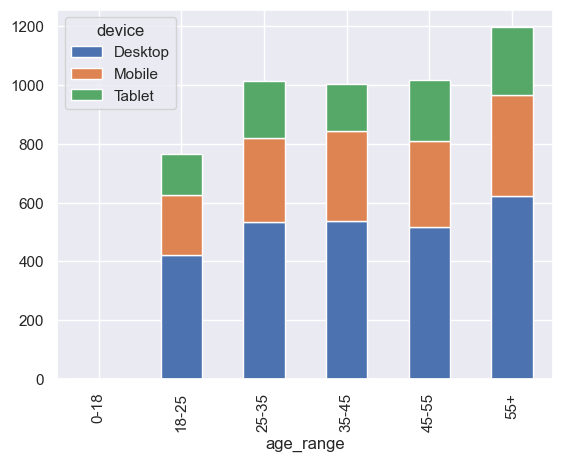

In [630]:
df_age_device = df.groupby(['age_range', 'device'])['device'].count().unstack().reset_index()

df_age_device.set_index('age_range', inplace=True)

df_age_device.plot(kind='bar', stacked=True)



In [631]:
df_age_checkout = df.groupby('age_range')['checkout_status'].value_counts().unstack().reset_index()
df_age_checkout['checkout_percentage'] = df_age_checkout[1] / (df_age_checkout[0] + df_age_checkout[1]) * 100

print(df_age_checkout)



checkout_status age_range    0    1  checkout_percentage
0                    0-18    0    0                  NaN
1                   18-25  546  220            28.720627
2                   25-35  735  279            27.514793
3                   35-45  740  262            26.147705
4                   45-55  757  261            25.638507
5                     55+  856  340            28.428094


In [632]:
df.head()

,userID,age,sessions,time_spent,pages_visited,cart_items,unit_price,cart_value,checkout_status,device,location,unit_price_range,age_range
0,1,62,3,13.295129,2,20,9.960500,199.21,0,Desktop,Location 1,8-10,55+
1,2,65,2,21.686405,3,21,14.039048,294.82,0,Desktop,Location 3,14-16,55+
2,3,18,7,17.135220,4,23,10.472609,240.87,0,Desktop,Location 4,10-12,18-25
3,4,21,9,29.589311,8,16,11.486250,183.78,1,Desktop,Location 2,10-12,18-25
4,5,21,3,25.948584,4,10,5.951000,59.51,1,Tablet,Location 4,4-6,18-25


In [633]:
df_location_checkout = df.groupby('location')['checkout_status'].value_counts().unstack().reset_index()
df_location_checkout['checkout_percentage'] = df_location_checkout[1] / (df_location_checkout[0] + df_location_checkout[1]) * 100

print(df_location_checkout)


checkout_status    location    0    1  checkout_percentage
0                Location 1  700  277            28.352098
1                Location 2  697  253            26.631579
2                Location 3  749  265            26.134122
3                Location 4  776  308            28.413284
4                Location 5  712  259            26.673532


In [634]:
df['time_spent_level'] = pd.qcut(df['time_spent'], q=[0, 0.4, 0.6, 0.9, 1], labels=['very low', 'low', 'medium', 'high'])



In [635]:
df.head()

,userID,age,sessions,time_spent,pages_visited,cart_items,unit_price,cart_value,checkout_status,device,location,unit_price_range,age_range,time_spent_level
0,1,62,3,13.295129,2,20,9.960500,199.21,0,Desktop,Location 1,8-10,55+,very low
1,2,65,2,21.686405,3,21,14.039048,294.82,0,Desktop,Location 3,14-16,55+,very low
2,3,18,7,17.135220,4,23,10.472609,240.87,0,Desktop,Location 4,10-12,18-25,very low
3,4,21,9,29.589311,8,16,11.486250,183.78,1,Desktop,Location 2,10-12,18-25,medium
4,5,21,3,25.948584,4,10,5.951000,59.51,1,Tablet,Location 4,4-6,18-25,low


<Axes: xlabel='time_spent_level', ylabel='checkout_percentage'>

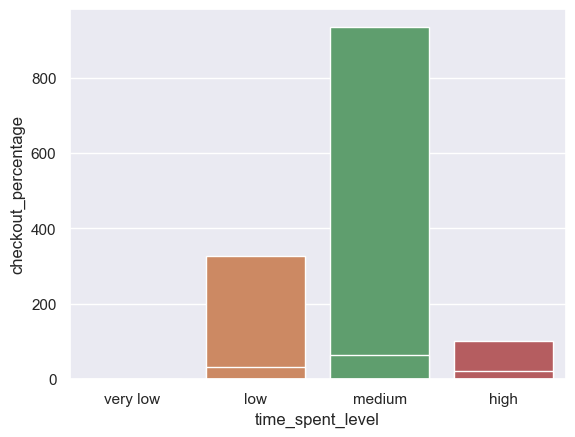

In [636]:

df_time_spent_checkout = df.groupby('time_spent_level')['checkout_status'].value_counts().unstack().reset_index()
df_time_spent_checkout['checkout_percentage'] = df_time_spent_checkout[1] / (df_time_spent_checkout[0] + df_time_spent_checkout[1]) * 100

sns.barplot(data=df_time_spent_checkout, x='time_spent_level', y=1)

sns.barplot(data=df_time_spent_checkout, x='time_spent_level', y='checkout_percentage')



<Axes: xlabel='age_range', ylabel='unit_price'>

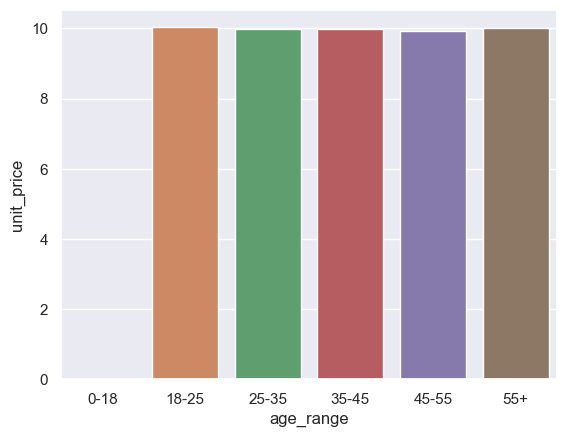

In [637]:

df_age_unit_price = df.groupby('age_range')['unit_price'].mean().reset_index()

sns.barplot(data=df_age_unit_price, x='age_range', y='unit_price')



In [638]:
df.head()

,userID,age,sessions,time_spent,pages_visited,cart_items,unit_price,cart_value,checkout_status,device,location,unit_price_range,age_range,time_spent_level
0,1,62,3,13.295129,2,20,9.960500,199.21,0,Desktop,Location 1,8-10,55+,very low
1,2,65,2,21.686405,3,21,14.039048,294.82,0,Desktop,Location 3,14-16,55+,very low
2,3,18,7,17.135220,4,23,10.472609,240.87,0,Desktop,Location 4,10-12,18-25,very low
3,4,21,9,29.589311,8,16,11.486250,183.78,1,Desktop,Location 2,10-12,18-25,medium
4,5,21,3,25.948584,4,10,5.951000,59.51,1,Tablet,Location 4,4-6,18-25,low


<Axes: xlabel='age_range', ylabel='cart_value'>

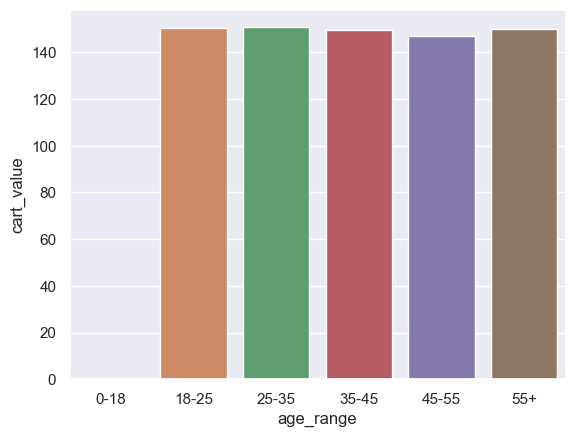

In [639]:

df_age_unit_price = df.groupby('age_range')['cart_value'].mean().reset_index()

sns.barplot(data=df_age_unit_price, x='age_range', y='cart_value')


In [640]:
df.groupby('cart_items')['checkout_status'].count()

cart_items
5     236
6     228
7     255
8     232
9     245
10    252
11    227
12    231
13    258
14    231
15    231
16    234
17    266
18    227
19    217
20    240
21    228
22    256
23    249
24    210
25    243
Name: checkout_status, dtype: int64

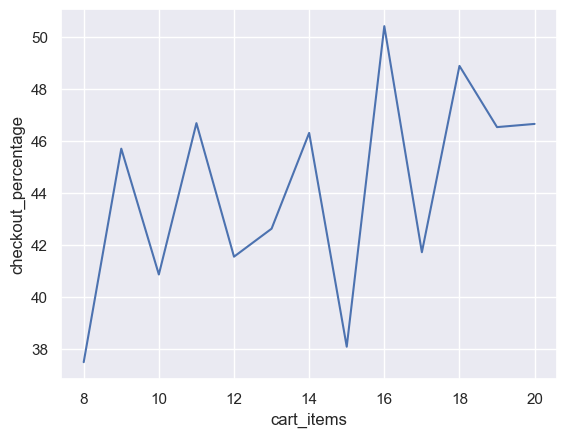

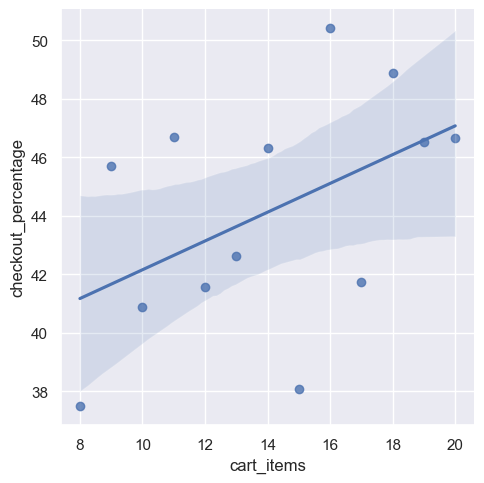

In [641]:
df_cart_items_checkout = df.groupby('cart_items')['checkout_status'].value_counts().unstack().reset_index()
df_cart_items_checkout['checkout_percentage'] = df_cart_items_checkout[1] / (df_cart_items_checkout[0] + df_cart_items_checkout[1]) * 100

sns.lineplot(data=df_cart_items_checkout, x='cart_items', y='checkout_percentage')
sns.lmplot(data=df_cart_items_checkout, x='cart_items', y='checkout_percentage')


In [642]:
from scipy.stats import ttest_ind
group_1 = df[df['checkout_status'] == 1]['cart_items']
group_0 = df[df['checkout_status'] == 0]['cart_items']

t_statistic, p_value = ttest_ind(group_1, group_0)

print("T-Statistic: ", t_statistic)
print("P-Value: ", p_value)


T-Statistic:  -6.076710953091002
P-Value:  1.3177377698990114e-09


We've found something here! It seems as though number of cart items and checkout status have a significant correlation.

In [643]:
cart_items_status = df.groupby('cart_items')['checkout_status'].sum()

<Axes: xlabel='cart_items', ylabel='checkout_status'>

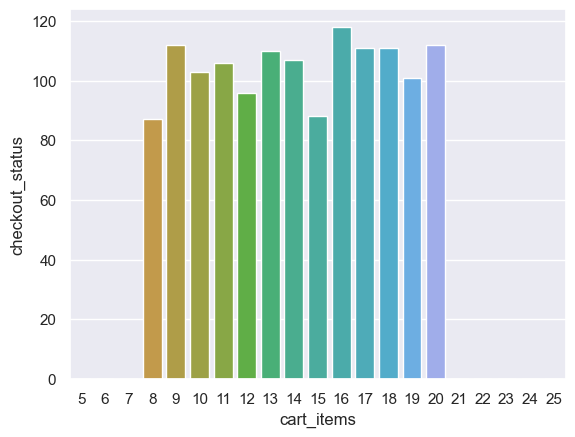

In [644]:


df_cart_items_checkout = df.groupby('cart_items')['checkout_status'].sum().reset_index()


sns.barplot(data=df_cart_items_checkout, x='cart_items', y='checkout_status')



We can see that 

<Axes: xlabel='age_range', ylabel='cart_items'>

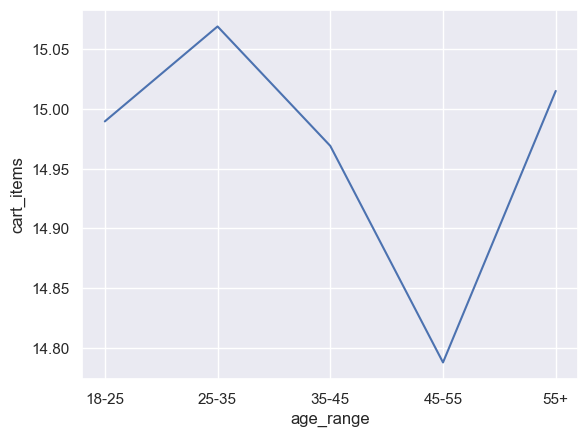

In [645]:

df_age_cart_items = df.groupby('age_range')['cart_items'].mean().reset_index()

sns.lineplot(data=df_age_cart_items, x='age_range', y='cart_items')



In [646]:
df.groupby('age_range')['cart_items'].mean()

age_range
0-18           NaN
18-25    14.989556
25-35    15.069034
35-45    14.969062
45-55    14.787819
55+      15.015050
Name: cart_items, dtype: float64

<Axes: xlabel='device', ylabel='checkout_percentage'>

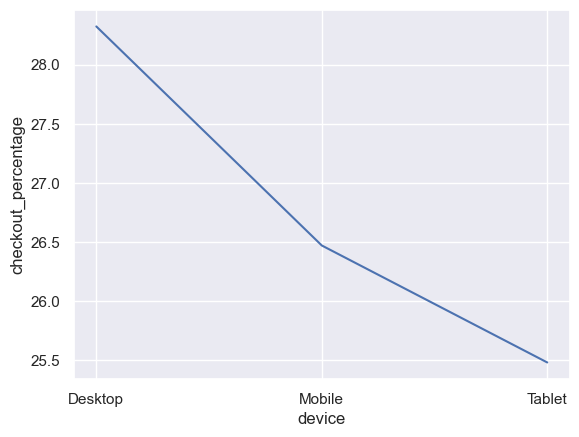

In [647]:
df_device_checkout = df.groupby('device')['checkout_status'].value_counts().unstack().reset_index()
df_device_checkout['checkout_percentage'] = df_device_checkout[1] / (df_device_checkout[0] + df_device_checkout[1]) * 100

sns.lineplot(data=df_device_checkout, x='device', y='checkout_percentage')

checkout_status    0    1
age_range                
0-18               0    0
18-25            546  220
25-35            735  279
35-45            740  262
45-55            757  261
55+              856  340


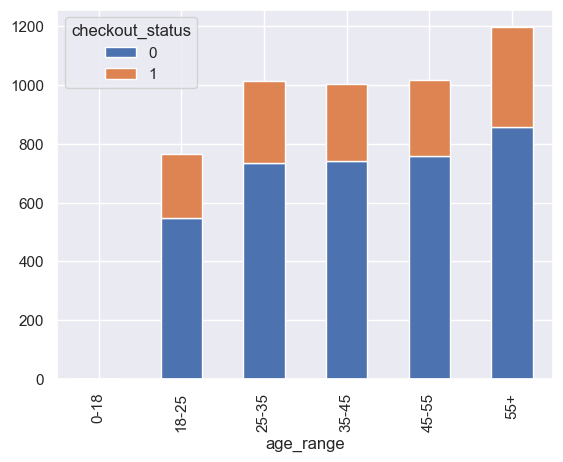

In [648]:

grouped_data = df.groupby(['age_range', 'checkout_status'])['checkout_status'].count().unstack()

grouped_data.plot(kind='bar', stacked=True)

print(grouped_data)



In [649]:
df.head()

,userID,age,sessions,time_spent,pages_visited,cart_items,unit_price,cart_value,checkout_status,device,location,unit_price_range,age_range,time_spent_level
0,1,62,3,13.295129,2,20,9.960500,199.21,0,Desktop,Location 1,8-10,55+,very low
1,2,65,2,21.686405,3,21,14.039048,294.82,0,Desktop,Location 3,14-16,55+,very low
2,3,18,7,17.135220,4,23,10.472609,240.87,0,Desktop,Location 4,10-12,18-25,very low
3,4,21,9,29.589311,8,16,11.486250,183.78,1,Desktop,Location 2,10-12,18-25,medium
4,5,21,3,25.948584,4,10,5.951000,59.51,1,Tablet,Location 4,4-6,18-25,low


age_range
0-18           NaN
18-25    28.720627
25-35    27.514793
35-45    26.147705
45-55    25.638507
55+      28.428094
Name: checkout_status, dtype: float64


/var/folders/4r/t2pxznrn4dz28d6ymprq1p9c0000gn/T/ipykernel_45333/3184955103.py:1: RuntimeWarning: invalid value encountered in scalar divide
  grouped_data = df.groupby('age_range')['checkout_status'].apply(lambda x: (x == 1).sum() / len(x) * 100)


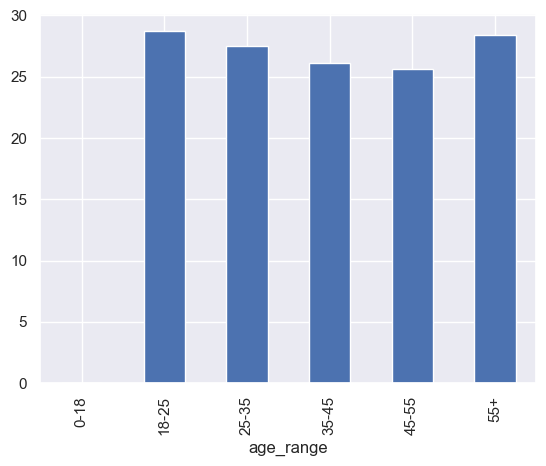

In [650]:

grouped_data = df.groupby('age_range')['checkout_status'].apply(lambda x: (x == 1).sum() / len(x) * 100)

grouped_data.plot(kind='bar')

print(grouped_data)



Conduct analysis on the provided data to identify the characteristics of users who check out, and those who don't. 

1) Based on your analysis, what can you conclude about the behaviour or characteristics of users who complete check out vs those who do not?

We know that the user base heavily skews older in terms of putting items in the cart. The user base also heavily uses desktop over mobile and tablet. We can aslo see that when using desktop, the ratio of successfult checkouts to unsuccessful checkouts is higher. We also know that users who complete the checkout tend to have more cart_items in their order. We also can see that on average those who spend a medium amount of time on the site tend to successfully checkout more. In general, the users who add more items, spend a medium amount of time, and skew older in age are the demographic that help the companies sales the most. It also showed significant results based on total cart_items to successfuly checkout.

2) How did you prepare your data for analysis? Describe your data cleaning and preparation approaches, and why these were the best choices.

To ensure the data being used was prepared for analysis, i first began by looking at the stats of the data set and reviewing what the data set had to offer. I saw that there were missing values in both device and location columns. However, these amounts were quite small compared to the data set as a whole, and filling them with their respective modes maintained the integrity of the dataset as a whole by not changing the major metrics of the data set too much (mean, median, mode, max, mins, etc). Because the amount was also small, using mode was the faster approach. I then searched for any outliers in the data set. The only ones which I found that had an inpact on the data was the time_spent of 90 minutes. I dropped that data so the distribution became uniform. The data had no duplicates. I also added extra variables like unit_price, age_range, unit_price_range to improve my ability to analyze the data. I also made sure all datatypes made sense, which they did.


3) What recommendations do you have for the product team? What should they do next? Be specific (i.e., who should they target, why and how).

Based on the checkout percentage amounts, it's quite clear that the desktop performs better than all other devices. Additionally, the more cart items someone has in their cart on average increases their likelihood to successfully purchase. We can also see that older users use the site more and also tend to successfully checkout more than other age groups. For this reason, we recommend the product team push towards products that would appeal to the older demographic (40+ or so) more so than younger demogrpahics. We also see that the more items someone has in their cart the more likely it is that they successfully purchase. The product team should look to implement some sort of system that would recommend users similar items that are in their cart in order to promote them adding more items to their cart and thus increasing the chances they successfully check out. Finally, pushing towards making the system best on desktop to promote the sales via desktop would help them improve on the system that most of their users shop from the most often and most successfully. 

Once you're finished, submit your completed notebook with answers to the above questions included in Markdown cells. Your code should be legible, easy to follow, and your answers to the questions should be clear and precise.